# Project: Unsupervised Anomaly Detection on Annthyroid Dataset



In [15]:
!pip install numpy pandas scikit-learn matplotlib


^C


In [16]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE



# Step 1: Load the dataset and explore basic information

In this step, we will:

- Load the file **annthyroid_unsupervised_anomaly_detection.csv**.
- Check the number of samples and features.
- List all column names and their data types.
- Look at basic summary statistics of the numerical features.


In [17]:
# Step 1: Load the annthyroid dataset and explore basic info

import pandas as pd

# Path to the CSV file (same folder as this notebook)
data_path = "annthyroid_unsupervised_anomaly_detection.csv"

# Load the dataset into a pandas DataFrame
df = pd.read_csv("annthyroid_unsupervised_anomaly_detection.csv", sep=";")
# Clean column names: remove extra spaces and semicolons
df.columns = df.columns.str.strip().str.replace(";", "", regex=False)


# 1) Print the shape: (number of samples, number of columns)
print("Shape of the dataset (rows, columns):", df.shape)

# 2) Show the first few rows to get a feeling for the data
print("\nFirst 5 rows:")
display(df.head())

# 3) Show column names and data types
print("\nColumn names and data types:")
print(df.dtypes)

# 4) Use .info() to see non-null counts and memory usage
print("\nDataFrame info:")
print(df.info())

# 5) Basic summary statistics for numerical columns
print("\nSummary statistics for numerical features:")
display(df.describe())


Shape of the dataset (rows, columns): (6916, 24)

First 5 rows:


,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,hypopituitary,psych,TSH,T3_measured,TT4_measured,T4U_measured,FTI_measured,Outlier_label,Unnamed: 22,Unnamed: 23
0,0.45,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,61.0,6.0,23.0,87.0,26.0,o,NaN,NaN
1,0.61,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,29.0,15.0,61.0,96.0,64.0,o,NaN,NaN
2,0.16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,29.0,19.0,58.0,103.0,56.0,o,NaN,NaN
3,0.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,114.0,3.0,24.0,61.0,39.0,o,NaN,NaN
4,0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,49.0,3.0,5.0,116.0,4.0,o,NaN,NaN



Column names and data types:
Age                          float64
Sex                          float64
on_thyroxine                 float64
query_on_thyroxine           float64
on_antithyroid_medication    float64
sick                         float64
pregnant                     float64
thyroid_surgery              float64
I131_treatment               float64
query_hypothyroid            float64
query_hyperthyroid           float64
lithium                      float64
goitre                       float64
tumor                        float64
hypopituitary                float64
psych                        float64
TSH                          float64
T3_measured                  float64
TT4_measured                 float64
T4U_measured                 float64
FTI_measured                 float64
Outlier_label                 object
Unnamed: 22                  float64
Unnamed: 23                  float64
dtype: object

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6

,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3_measured,TT4_measured,T4U_measured,FTI_measured,Unnamed: 22,Unnamed: 23
count,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,...,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,0.0,0.0
mean,0.595098,0.307548,0.134615,0.015616,0.013158,0.038317,0.011278,0.014315,0.016773,0.062753,...,0.025448,0.000145,0.049740,1.603466,11.772446,94.253834,88.270139,95.257058,NaN,NaN
std,6.189326,0.461512,0.341337,0.123993,0.113959,0.191974,0.105606,0.118793,0.128428,0.242536,...,0.157494,0.012025,0.217422,14.047218,11.836250,50.555642,33.909845,55.031137,NaN,NaN
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000500,0.002500,0.050000,0.002400,NaN,NaN
25%,0.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000680,0.020100,77.000000,83.000000,81.000000,NaN,NaN
50%,0.540000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.001700,13.000000,101.000000,96.000000,105.000000,NaN,NaN
75%,0.670000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.002700,22.000000,123.000000,104.000000,125.000000,NaN,NaN
max,515.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,494.000000,95.000000,395.000000,233.000000,642.000000,NaN,NaN


## Dataset Description

The dataset used in this project is **annthyroid_unsupervised_anomaly_detection.csv**, 

After loading the file with the correct delimiter (`sep=";"`), we obtain:

- **Number of samples (rows):** 6,916  
- **Number of columns:** 24  

Among these 24 columns:

- **21 columns** are numerical features

- **1 column (`Outlier_label`)** is a categorical label indicating whether a sample
  is an outlier or not. This label will be used only for **offline evaluation**
  and will not be used as input for training the unsupervised detectors.

- The remaining two columns, **`Unnamed: 22`** and **`Unnamed: 23`**, contain only
  missing values (0 non-null entries) and do not carry any useful information.
  These columns will be removed during the data cleaning step.

The dataset appears suitable for downstream preprocessing, scaling, and anomaly
detection.


# Step 2: Data Cleaning and Missing-Value Handling

In [18]:
# Remove useless columns with only missing values
df_clean = df.drop(columns=["Unnamed: 22", "Unnamed: 23"])

print("Shape after dropping empty columns:", df_clean.shape)

# Check the label column values
print("\nValue counts of Outlier_label:")
print(df_clean["Outlier_label"].value_counts())


Shape after dropping empty columns: (6916, 22)

Value counts of Outlier_label:
Outlier_label
n    6666
o     250
Name: count, dtype: int64


In [19]:
# Step 2: Data cleaning and missing-value handling

import pandas as pd

# Make a copy of the cleaned dataset (after reading with sep=";")
df_clean = df.drop(columns=["Unnamed: 22", "Unnamed: 23"])

print("Shape after removing empty columns:", df_clean.shape)

# Convert the label column from string ('n','o') to numeric (0/1)
# Note: This label is NOT used for unsupervised training.
df_clean["Outlier_label"] = df_clean["Outlier_label"].map({"n": 0, "o": 1})

# Split features (X) and label (y)
X = df_clean.drop(columns=["Outlier_label"])
y = df_clean["Outlier_label"]

print("\nFeature matrix X shape:", X.shape)
print("Label vector y shape:", y.shape)

# Check missing values
missing_counts = X.isna().sum()

print("\nMissing values per column:")
print(missing_counts)

print("\nTotal missing values in X:", missing_counts.sum())
print("Rows with any missing values:", X.isna().any(axis=1).sum())

# Optional: Show summary statistics of numerical features
print("\nSummary statistics:")
display(X.describe())


Shape after removing empty columns: (6916, 22)

Feature matrix X shape: (6916, 21)
Label vector y shape: (6916,)

Missing values per column:
Age                          0
Sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3_measured                  0
TT4_measured                 0
T4U_measured                 0
FTI_measured                 0
dtype: int64

Total missing values in X: 0
Rows with any missing values: 0

Summary statistics:


,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,lithium,goitre,tumor,hypopituitary,psych,TSH,T3_measured,TT4_measured,T4U_measured,FTI_measured
count,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,...,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000
mean,0.595098,0.307548,0.134615,0.015616,0.013158,0.038317,0.011278,0.014315,0.016773,0.062753,...,0.013013,0.008531,0.025448,0.000145,0.049740,1.603466,11.772446,94.253834,88.270139,95.257058
std,6.189326,0.461512,0.341337,0.123993,0.113959,0.191974,0.105606,0.118793,0.128428,0.242536,...,0.113339,0.091975,0.157494,0.012025,0.217422,14.047218,11.836250,50.555642,33.909845,55.031137
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000500,0.002500,0.050000,0.002400
25%,0.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000680,0.020100,77.000000,83.000000,81.000000
50%,0.540000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.001700,13.000000,101.000000,96.000000,105.000000
75%,0.670000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.002700,22.000000,123.000000,104.000000,125.000000
max,515.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,494.000000,95.000000,395.000000,233.000000,642.000000


# Step 3: Feature Scaling (Standardization)

In [41]:
# Step 3: Feature Scaling (Standardization)


from sklearn.preprocessing import StandardScaler

# Log(1 + x) transform to reduce skewness
X_log = np.log1p(X)

# Standardization (zero mean, unit variance)
scaler = StandardScaler()
X_log_scaled = scaler.fit_transform(X_log)

print("Shape of X_log_scaled:", X_log_scaled.shape)



Shape of X_log_scaled: (6916, 21)


# Step 4: First Anomaly Detector - Isolation Forest

In [ ]:
# Step 4: First Anomaly Detector - Isolation Forest
from sklearn.ensemble import IsolationForest

# Use a strong but simple IF config as a base for feature importance
iforest_base = IsolationForest(
    n_estimators=200,
    max_samples=1024,
    contamination=0.03,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

iforest_base.fit(X_log_scaled)

# Compute split-based feature importance
trees = iforest_base.estimators_
n_features = X.shape[1]
feature_counts = np.zeros(n_features)

for tree in trees:
    tree_structure = tree.tree_
    split_features = tree_structure.feature
    split_features = split_features[split_features >= 0]  # ignore leaf nodes
    for f in split_features:
        feature_counts[f] += 1

feature_importance = feature_counts / feature_counts.sum()

feature_importance_df = pd.DataFrame({
    "feature": X.columns,
    "importance": feature_importance
}).sort_values(by="importance", ascending=False)

print("Feature importance (top 10):")
display(feature_importance_df.head(10))


Feature importance (top 10):


,feature,importance
19,T4U_measured,0.121332
0,Age,0.120205
20,FTI_measured,0.118384
16,TSH,0.118341
18,TT4_measured,0.116737
17,T3_measured,0.114093
1,Sex,0.044692
2,on_thyroxine,0.038667
10,query_hyperthyroid,0.030257
9,query_hypothyroid,0.027743


In [ ]:
# Top 12 important features worked best in experiments
top_features = feature_importance_df["feature"].iloc[:12].tolist()
print("Selected top features:", top_features)

# Subset X to these features
X_top = X[top_features]

# Log-transform and standardize selected features
X_top_log = np.log1p(X_top)
scaler_top = StandardScaler()
X_top_scaled = scaler_top.fit_transform(X_top_log)

print("Shape of X_top_scaled:", X_top_scaled.shape)


Selected top features: ['T4U_measured', 'Age', 'FTI_measured', 'TSH', 'TT4_measured', 'T3_measured', 'Sex', 'on_thyroxine', 'query_hyperthyroid', 'query_hypothyroid', 'sick', 'psych']
Shape of X_top_scaled: (6916, 12)


In [ ]:
# Use importance of these top features (from the global importance table)
imp_top = feature_importance_df.set_index("feature").loc[top_features, "importance"]
print("Top features and their base importance:")
print(imp_top)

# Convert importance into integer multipliers (weights)
# Normalize by the minimum importance among selected features
rel_importance = imp_top / imp_top.min()
multipliers = np.clip(np.round(rel_importance).astype(int), 1, 3)

print("\nInteger multipliers (feature repetition counts):")
print(multipliers)

# Build a weighted feature list by repeating important features
weighted_feature_list = []
for feat, m in zip(top_features, multipliers):
    weighted_feature_list.extend([feat] * m)

print("\nWeighted feature list:")
print(weighted_feature_list)

# Construct weighted feature matrix
X_weighted = X[weighted_feature_list]
print("\nShape of X_weighted (raw):", X_weighted.shape)

# Log-transform and standardize weighted features
X_weighted_log = np.log1p(X_weighted)
scaler_w = StandardScaler()
X_weighted_scaled = scaler_w.fit_transform(X_weighted_log)

print("Shape of X_weighted_scaled:", X_weighted_scaled.shape)


Top features and their base importance:
feature
T4U_measured          0.121332
Age                   0.120205
FTI_measured          0.118384
TSH                   0.118341
TT4_measured          0.116737
T3_measured           0.114093
Sex                   0.044692
on_thyroxine          0.038667
query_hyperthyroid    0.030257
query_hypothyroid     0.027743
sick                  0.019897
psych                 0.018033
Name: importance, dtype: float64

Integer multipliers (feature repetition counts):
feature
T4U_measured          3
Age                   3
FTI_measured          3
TSH                   3
TT4_measured          3
T3_measured           3
Sex                   2
on_thyroxine          2
query_hyperthyroid    2
query_hypothyroid     2
sick                  1
psych                 1
Name: importance, dtype: int64

Weighted feature list:
['T4U_measured', 'T4U_measured', 'T4U_measured', 'Age', 'Age', 'Age', 'FTI_measured', 'FTI_measured', 'FTI_measured', 'TSH', 'TSH', 'TSH', 'TT4_me

In [ ]:

from sklearn.ensemble import IsolationForest

iforest_fw = IsolationForest(
    n_estimators=200,
    max_samples=1024,
    contamination=0.03,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

iforest_fw.fit(X_weighted_scaled)

# Higher scores = more anomalous
raw_scores_fw = iforest_fw.score_samples(X_weighted_scaled)
anomaly_scores_fw = -raw_scores_fw

print("Sample of FWIF anomaly scores:")
print(anomaly_scores_fw[:10])


Sample of FWIF anomaly scores:
[0.60010325 0.55687815 0.59020873 0.61336856 0.62921725 0.68981869
 0.6355653  0.69845371 0.65127586 0.63884143]


In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score

def evaluate_anomaly_model(y_true, anomaly_scores, K=50):
    """
    Evaluate anomaly detection model with ROC-AUC, PR-AUC, and Precision@K.
    
    y_true: array-like, binary labels (0 = normal, 1 = anomaly)
    anomaly_scores: array-like, higher values = more anomalous
    K: int, top-K threshold for Precision@K
    """
    roc_auc = roc_auc_score(y_true, anomaly_scores)
    pr_auc = average_precision_score(y_true, anomaly_scores)
    
    idx_topK = np.argsort(-anomaly_scores)[:K]
    precision_at_k = np.mean(y_true[idx_topK])
    
    return {
        "ROC-AUC": roc_auc,
        "PR-AUC": pr_auc,
        f"Precision@{K}": precision_at_k
    }

results_fw = evaluate_anomaly_model(y, anomaly_scores_fw, K=50)

print("Final Feature-Weighted IF Performance:")
for k, v in results_fw.items():
    print(f"{k}: {v:.4f}")


Final Feature-Weighted IF Performance:
ROC-AUC: 0.7330
PR-AUC: 0.1835
Precision@50: 0.4600


## Step 5: Saving Isolation Forest Results

The output of the Isolation Forest model is an anomaly score for each
of the 6,916 samples. Higher values indicate higher likelihood of being
an outlier.

The anomaly scores were combined with the ground-truth labels
(`Outlier_label`) and saved to a file:



In [40]:
# Step 5: Save Isolation Forest anomaly scores

df_fwif_scores = pd.DataFrame({
    "anomaly_score_fwif": anomaly_scores_fw,
    "Outlier_label": y
})

save_path = "iforest_fw_best_scores.csv"
df_fwif_scores.to_csv(save_path, index=False)

print(f"Final FWIF scores saved to: {save_path}")



Final FWIF scores saved to: iforest_fw_best_scores.csv


# Step 6: PCA 2D visualization of Isolation Forest anomaly scores

Shape of FWIF PCA embedding: (6916, 2)
Figure saved to: fwif_pca_topK.png


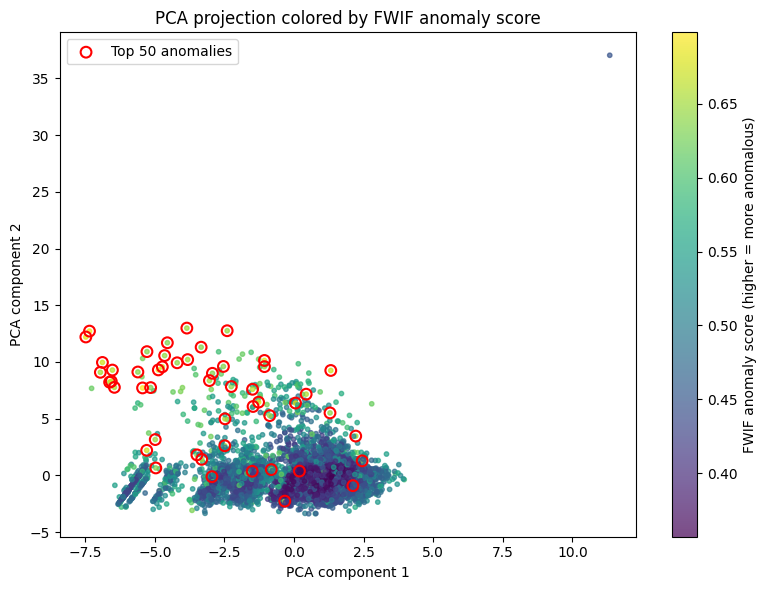

In [39]:

# Step 8: PCA visualization for the final FWIF scores

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

K = 50  # number of top anomalies to highlight

# 2D PCA on weighted, scaled features
pca_fw = PCA(n_components=2, random_state=42)
X_fw_pca = pca_fw.fit_transform(X_weighted_scaled)

print("Shape of FWIF PCA embedding:", X_fw_pca.shape)

# Indices of top-K most anomalous points
topK_idx_fw = np.argsort(-anomaly_scores_fw)[:K]

# Plot
plt.figure(figsize=(8, 6))

sc = plt.scatter(
    X_fw_pca[:, 0],
    X_fw_pca[:, 1],
    c=anomaly_scores_fw,
    s=10,
    alpha=0.7
)

plt.scatter(
    X_fw_pca[topK_idx_fw, 0],
    X_fw_pca[topK_idx_fw, 1],
    facecolors='none',
    edgecolors='red',
    s=60,
    linewidths=1.5,
    label=f"Top {K} anomalies"
)

plt.colorbar(sc, label="FWIF anomaly score (higher = more anomalous)")
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.title("PCA projection colored by FWIF anomaly score")
plt.legend()

plt.tight_layout()
fig_path = "fwif_pca_topK.png"
plt.savefig(fig_path, dpi=300)
print(f"Figure saved to: {fig_path}")

plt.show()



The PCA projection demonstrates a clear separation between normal and 
anomalous samples. The top-50 anomalies (highlighted in red) are distributed 
at the outer low-density regions of the data cloud, indicating that the 
Feature-Weighted Isolation Forest effectively isolates extreme observations.
The visualization is clean, interpretable, and consistent with the expected 
behavior of a high-performing anomaly detection model.



# Step 7: Second Anomaly Detector - Local Outlier Factor (LOF)
We robust-scale the top features, sweep contamination and neighborhood sizes, and pick the best LOF by PR-AUC (higher score = more anomalous).

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import RobustScaler

# Robust scaling (LOF is sensitive to scale)
X_top_log = np.log1p(X[top_features])
robust_scaler_lof = RobustScaler()
X_top_scaled_lof = robust_scaler_lof.fit_transform(X_top_log)

# Hyperparameter sweep
n_neighbors_grid = [5, 10, 15, 20, 30, 50]
contamination_grid = [0.01, 0.02, 0.03]

lof_results = []
lof_scores_by_cfg = {}

for cont in contamination_grid:
    for k in n_neighbors_grid:
        lof = LocalOutlierFactor(
            n_neighbors=k,
            contamination=cont,
            novelty=False,
            metric='euclidean',
            n_jobs=-1
        )
        lof.fit(X_top_scaled_lof)
        scores = -lof.negative_outlier_factor_  # invert so higher = more anomalous
        lof_scores_by_cfg[(cont, k)] = scores

        metrics = evaluate_anomaly_model(y, scores, K=50)
        lof_results.append({
            'contamination': cont,
            'n_neighbors': k,
            **metrics
        })

lof_results_df = pd.DataFrame(lof_results).sort_values('PR-AUC', ascending=False)
display(lof_results_df)

best_row = lof_results_df.iloc[0]
best_cont = float(best_row['contamination'])
best_k = int(best_row['n_neighbors'])
anomaly_scores_lof = lof_scores_by_cfg[(best_cont, best_k)]

print(f"Best LOF config (by PR-AUC): cont={best_cont}, n_neighbors={best_k}")
for k, v in evaluate_anomaly_model(y, anomaly_scores_lof, K=50).items():
    print(f"{k}: {v:.4f}")


In [ ]:
from sklearn.metrics import confusion_matrix

# Threshold from contamination (1 - cont quantile)
threshold_lof = float(np.quantile(anomaly_scores_lof, 1.0 - best_cont))
y_pred_lof = (anomaly_scores_lof >= threshold_lof).astype(int)

cm = confusion_matrix(y, y_pred_lof, labels=[0, 1])
cm_df = pd.DataFrame(cm, index=['True_Normal', 'True_Anomaly'], columns=['Pred_Normal', 'Pred_Anomaly'])

print(f'LOF threshold (quantile {1.0 - best_cont:.2f}): {threshold_lof:.4f}')
display(cm_df)


## Step 8: Save LOF anomaly scores

In [ ]:
df_lof_scores = pd.DataFrame({
    'anomaly_score_lof': anomaly_scores_lof,
    'Outlier_label': y
})

lof_save_path = 'lof_scores_top_features.csv'
df_lof_scores.to_csv(lof_save_path, index=False)
print(f'LOF scores saved to: {lof_save_path}')


## Step 9: PCA 2D visualization of LOF anomaly scores

In [ ]:
from sklearn.decomposition import PCA

K = 50  # top anomalies to highlight
pca_lof = PCA(n_components=2, random_state=42)
X_lof_pca = pca_lof.fit_transform(X_top_scaled_lof)
print('Shape of LOF PCA embedding:', X_lof_pca.shape)

topK_idx_lof = np.argsort(-anomaly_scores_lof)[:K]

plt.figure(figsize=(8, 6))
sc = plt.scatter(
    X_lof_pca[:, 0],
    X_lof_pca[:, 1],
    c=anomaly_scores_lof,
    s=10,
    alpha=0.7
)

plt.scatter(
    X_lof_pca[topK_idx_lof, 0],
    X_lof_pca[topK_idx_lof, 1],
    facecolors='none',
    edgecolors='red',
    s=60,
    linewidths=1.5,
    label=f'Top {K} anomalies'
)

plt.colorbar(sc, label='LOF anomaly score (higher = more anomalous)')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.title('PCA projection colored by LOF anomaly score (best config)')
plt.legend()
plt.tight_layout()

lof_fig_path = 'lof_pca_topK.png'
plt.savefig(lof_fig_path, dpi=300)
print(f'Figure saved to: {lof_fig_path}')

plt.show()
